In [1]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

d = 5000 # Maximum number of features

In [5]:
train_data, test_data, train_labels, test_labels = load_all_data()

train_data = train_data.T
test_data = test_data.T

Found the two datafiles.
Finished loading in 0.92 seconds.


In [6]:
#print the shape of train_data and test_data, and the shape of train_labels and test_labels
print(train_data.shape)
print(test_data.shape)
print('------')
print(train_labels.shape)
print(test_labels.shape)


(784, 38000)
(784, 4000)
------
(38000,)
(4000,)


In [9]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print(gain)

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
test_data = test_data[ranks[:d], :]

# randomly shuffle data
num_training = train_data.shape[1] #Get the number of rows

order = list(range(num_training))
random.shuffle(order)

train_data = train_data[:, order]
train_labels = train_labels[order]

[ 1.72137218e+00  1.61454186e+00  1.42399593e+00  1.28337290e+00
  1.15919973e+00  1.13781462e+00  1.08728838e+00  1.06726368e+00
  9.90451498e-01  9.80035269e-01  9.46999999e-01  9.43829962e-01
  9.35998507e-01  9.27908978e-01  9.22695996e-01  8.94103010e-01
  8.92344537e-01  8.82689274e-01  8.74063379e-01  8.71063775e-01
  8.66606200e-01  8.50887044e-01  8.50391888e-01  8.44929349e-01
  8.27963725e-01  8.10634217e-01  8.10121368e-01  8.08769338e-01
  8.07572045e-01  7.82285217e-01  7.42755970e-01  7.39869649e-01
  7.39270736e-01  7.29378153e-01  7.29340848e-01  7.23846417e-01
  7.07924324e-01  6.99646565e-01  6.98530491e-01  6.78070795e-01
  6.64840376e-01  6.62633500e-01  6.61237323e-01  6.56127882e-01
  6.46845235e-01  6.37411695e-01  6.36303801e-01  6.36132696e-01
  6.35669782e-01  6.32085005e-01  6.23689681e-01  6.13506483e-01
  6.13381086e-01  5.99523472e-01  5.76522599e-01  5.51473371e-01
  5.49764881e-01  5.45960391e-01  5.45770185e-01  5.41578237e-01
  5.21852518e-01  5.21837

In [10]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 250

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

# Apply cross-validation on training data to select hyper-parameter (max depth) of decision trees
depth_values = np.array([2, 4, 8, 16, 32, 64])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

Text(0.5, 1.0, 'Decision Tree Cross-Validation Accuracy')

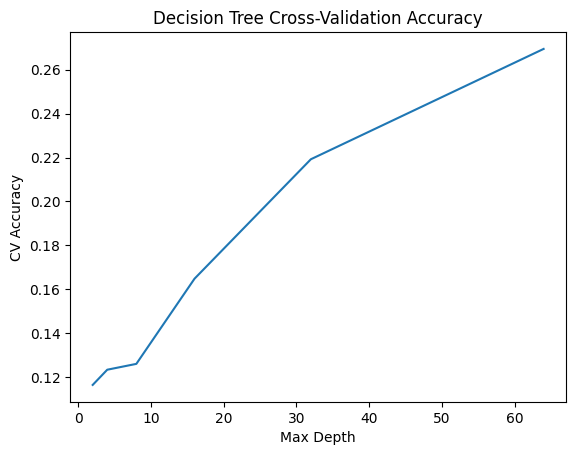

In [11]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [12]:
# Try naive Bayes 
nb_params = {}
nb_model = naive_bayes_train(train_data, train_labels, nb_params)


# Compute training accuracy
nb_train_predictions = naive_bayes_predict(train_data, nb_model)
nb_train_accuracy = np.mean(nb_train_predictions == train_labels)
print("Naive Bayes training accuracy: %f" % nb_train_accuracy)


# Compute testing accuracy
nb_test_predictions = naive_bayes_predict(test_data, nb_model)
nb_test_accuracy = np.mean(nb_test_predictions == test_labels)
print("Naive Bayes testing accuracy: %f" % nb_test_accuracy)

Naive Bayes training accuracy: 0.649763
Naive Bayes testing accuracy: 0.652750


In [13]:
# Train on full training data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

In [14]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)

print("Decision tree testing accuracy: %f" % dt_accuracy)

Decision tree testing accuracy: 0.292000
